In [49]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions

In [50]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt
path = '/content/seeds_dataset.txt'
features = ['Area','Perimeter','Compactness','Length of kernel',
           'Width of kernel','Asymmetry coefficient', 'Length of kernel groove','target']

df = pd.read_csv(path, delimiter=r'[\t]+', header=None, names=features)

df.head()

--2023-02-28 04:58:21--  https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9300 (9.1K) [application/x-httpd-php]
Saving to: ‘seeds_dataset.txt.1’

seeds_dataset.txt.1 100%[===================>]   9.08K  --.-KB/s    in 0s      

2023-02-28 04:58:22 (72.7 MB/s) - ‘seeds_dataset.txt.1’ saved [9300/9300]



/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [51]:
data=np.loadtxt("seeds_dataset.txt")
print(data)


[[15.26   14.84    0.871  ...  2.221   5.22    1.    ]
 [14.88   14.57    0.8811 ...  1.018   4.956   1.    ]
 [14.29   14.09    0.905  ...  2.699   4.825   1.    ]
 ...
 [13.2    13.66    0.8883 ...  8.315   5.056   3.    ]
 [11.84   13.21    0.8521 ...  3.598   5.044   3.    ]
 [12.3    13.34    0.8684 ...  5.637   5.063   3.    ]]


In [52]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print('Class labels:', np.unique(y))

# Print number of instances and features
print("Number of instances:", X.shape[0])
print("Number of features:", X.shape[1])


Class labels: [1 2 3]
Number of instances: 210
Number of features: 7


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [54]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # prepare marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    if X.shape[1] > 1:  # check if input array has at least two features
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    else:
        x2_min, x2_max = -1, 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    if X.shape[1] > 1:  # check if input array has at least two features
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl,
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolor='black',
                    alpha=1.0, linewidth=1, marker='o',
                    s=100, label='test set')

In [55]:
sc = StandardScaler()
X_train_std = pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
X_test_std = pd.DataFrame(sc.transform(X_test),columns=X_test.columns)
print('Labels counts in y:', np.bincount(y)[1:])
print('Labels counts in y_train:', np.bincount(y_train)[1:])
print('Labels counts in y_test:', np.bincount(y_test)[1:])

Labels counts in y: [70 70 70]
Labels counts in y_train: [49 49 49]
Labels counts in y_test: [21 21 21]


# #randomizer program

In [56]:


# Create the SVM model with regularization, maximum margin, and maximum iteration
clf = svm.SVC(C=1.0, kernel='linear', max_iter=1000)

# Fit the model using the training data
clf.fit(X_train, y_train)

# Predict the class of the test data
Y_pred = clf.predict(X_test)

# Print the accuracy of the model
accuracy = np.mean(Y_pred == y_test) * 100
print("Accuracy: {}%".format(accuracy))

Accuracy: 92.06349206349206%


In [57]:
# determine the number of cells to randomize
num_cells = data.size
num_cells_to_randomize = int(num_cells * 0.2)

# generate random indices for the cells to randomize
random_indices = np.random.choice(num_cells, size=num_cells_to_randomize, replace=False)

# create a copy of the original wheat seed array
wheat_seed_randomized = np.copy(data)

# randomize the selected cells
wheat_seed_randomized.flat[random_indices] = np.random.rand(num_cells_to_randomize)

# create an imputer object to fill in any missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# impute the missing values in the randomized array
wheat_seed_randomized_imputed = imputer.fit_transform(wheat_seed_randomized)

# print the original and randomized arrays
print("Original wheat seed features:")
print(data)
print("Randomized wheat seed features:")
print(wheat_seed_randomized)
print("Imputed randomized wheat seed features:")
print(wheat_seed_randomized_imputed)

Original wheat seed features:
[[15.26   14.84    0.871  ...  2.221   5.22    1.    ]
 [14.88   14.57    0.8811 ...  1.018   4.956   1.    ]
 [14.29   14.09    0.905  ...  2.699   4.825   1.    ]
 ...
 [13.2    13.66    0.8883 ...  8.315   5.056   3.    ]
 [11.84   13.21    0.8521 ...  3.598   5.044   3.    ]
 [12.3    13.34    0.8684 ...  5.637   5.063   3.    ]]
Randomized wheat seed features:
[[15.26       14.84        0.67269616 ...  2.221       5.22
   0.70641679]
 [14.88       14.57        0.8811     ...  1.018       4.956
   1.        ]
 [ 0.68855385 14.09        0.70421048 ...  2.699       4.825
   0.60302703]
 ...
 [13.2        13.66        0.8883     ...  8.315       0.34085419
   3.        ]
 [11.84       13.21        0.54109293 ...  3.598       0.17326534
   0.15543769]
 [12.3        13.34        0.8684     ...  5.637       5.063
   3.        ]]
Imputed randomized wheat seed features:
[[15.26       14.84        0.67269616 ...  2.221       5.22
   0.70641679]
 [14.88       14

In [58]:
# Randomly shuffle a percentage of the wheat seed samples
percent_shuffled = 25  # Percentage of samples to shuffle
n_samples = df.shape[0]
n_shuffled = int(n_samples * percent_shuffled / 100)
indices_shuffled = np.random.choice(n_samples, size=n_shuffled, replace=False)
df_shuffled = df.copy()
df_shuffled.iloc[indices_shuffled, :-1] = np.random.permutation(df_shuffled.iloc[indices_shuffled, :-1].values)

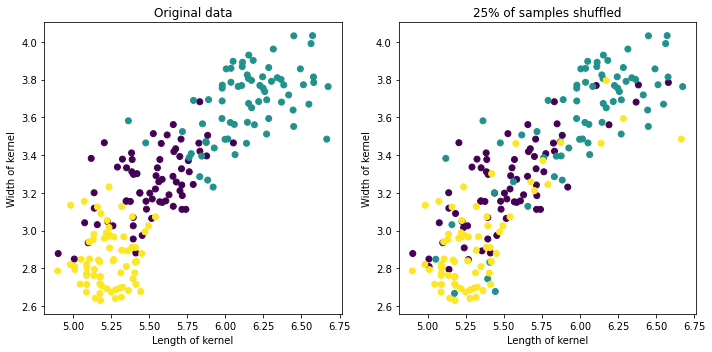

In [59]:
# Plot the original and shuffled data side by side
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
axs[0].scatter(df['Length of kernel'], df['Width of kernel'], c=df['target'])
axs[0].set_xlabel('Length of kernel')
axs[0].set_ylabel('Width of kernel')
axs[0].set_title('Original data')
axs[1].scatter(df_shuffled['Length of kernel'], df_shuffled['Width of kernel'], c=df_shuffled['target'])
axs[1].set_xlabel('Length of kernel')
axs[1].set_ylabel('Width of kernel')
axs[1].set_title(f'{percent_shuffled}% of samples shuffled')
plt.tight_layout()
plt.show()

### #2.Select a learning algorithm or algorithms and use the imputing solutions from scikit learn to compare results from the unaffected original data.

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [61]:
imputer = SimpleImputer(strategy='mean')


In [62]:
# Fit the imputer to the training data
imputer.fit(X_train)
# Transform the training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [63]:
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_imputed[:, :2], y_train.values)

<ipython-input-54-1900c9d837c7>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


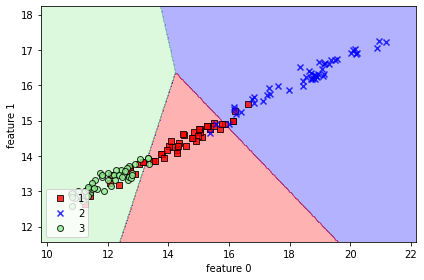

In [64]:
plot_decision_regions(X_train_imputed[:, :2], y_train.values, classifier=lr)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.axis('tight')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [65]:
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_test_imputed[:, :2], y_test.values)

<ipython-input-54-1900c9d837c7>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


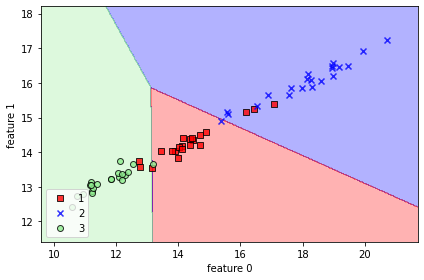

In [66]:
plot_decision_regions(X_test_imputed[:, :2], y_test.values, classifier=lr)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.axis('tight')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [67]:
# Make predictions on the imputed testing data
y_pred_imputed = lr.predict(X_test_imputed[:, :2])

# Calculate the accuracy of the model on the imputed testing data
accuracy_imputed = accuracy_score(y_test, y_pred_imputed)
print("accuracy= ",accuracy_imputed)

accuracy=  0.8888888888888888


In [68]:
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train.values[:,:2], y_train.values)

<ipython-input-54-1900c9d837c7>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


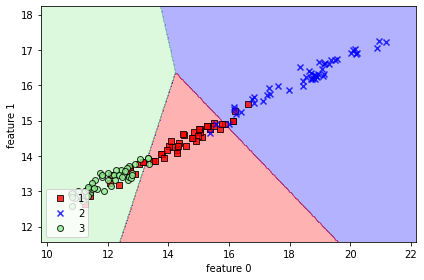

In [69]:
plot_decision_regions(X_train.values[:,:2], y_train.values, classifier=lr)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.axis('tight')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [70]:
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_test.values[:,:2], y_test.values)

<ipython-input-54-1900c9d837c7>:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


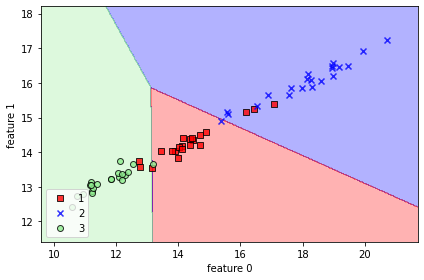

In [71]:
plot_decision_regions(X_test.values[:, :2], y_test.values, classifier=lr)
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.axis('tight')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [72]:
# Make predictions on the original testing data
y_pred_orig = lr.predict(X_test.values[:,:2])

# Calculate the accuracy of the model on the original testing data
accuracy_orig = accuracy_score(y_test, y_pred_orig)

In [73]:
# Compare the accuracies of the two models
print('Accuracy with imputed data:', accuracy_imputed)
print('Accuracy with original data:', accuracy_orig)

Accuracy with imputed data: 0.8888888888888888
Accuracy with original data: 0.8888888888888888


In [74]:
data=np.loadtxt("seeds_dataset.txt")
print(data)
     

[[15.26   14.84    0.871  ...  2.221   5.22    1.    ]
 [14.88   14.57    0.8811 ...  1.018   4.956   1.    ]
 [14.29   14.09    0.905  ...  2.699   4.825   1.    ]
 ...
 [13.2    13.66    0.8883 ...  8.315   5.056   3.    ]
 [11.84   13.21    0.8521 ...  3.598   5.044   3.    ]
 [12.3    13.34    0.8684 ...  5.637   5.063   3.    ]]


In [75]:
# check for missing values
print(np.isnan(data).sum())

0


manipulating the data with 10% of cells and replacing it with NaN 

In [79]:
# get the number of rows and columns of the data
n_rows, n_cols = X.shape
# randomly select 10% of cells and replace with NaN
n_rows, n_cols = X.shape
n_cells = int(n_rows * n_cols * 0.1) # 10% of cells
indices = np.random.choice(n_rows*n_cols, n_cells, replace=False)
row_indices = indices // n_cols
col_indices = indices % n_cols
X.values[row_indices, col_indices] = np.nan

In [80]:
# print the NaN values
print(X.isna().sum())

Area                       19
Perimeter                  16
Compactness                27
Length of kernel           15
Width of kernel            20
Asymmetry coefficient      26
Length of kernel groove    24
dtype: int64


In [81]:
# print the manipulated data
print(X.head(10))

    Area  Perimeter  Compactness  Length of kernel  Width of kernel  \
0  15.26      14.84       0.8710             5.763            3.312   
1  14.88      14.57       0.8811               NaN            3.333   
2  14.29      14.09       0.9050             5.291            3.337   
3  13.84      13.94       0.8955             5.324            3.379   
4  16.14      14.99       0.9034               NaN            3.562   
5  14.38      14.21       0.8951               NaN            3.312   
6  14.69      14.49       0.8799             5.563            3.259   
7  14.11      14.10       0.8911             5.420              NaN   
8  16.63      15.46       0.8747             6.053              NaN   
9  16.44      15.25       0.8880             5.884            3.505   

   Asymmetry coefficient  Length of kernel groove  
0                  2.221                    5.220  
1                  1.018                    4.956  
2                  2.699                    4.825  
3         

NaN values replaced with mean imputer

In [83]:

X_imputed = imputer.fit_transform(X)


print('Number of NaN values before imputation:\n', np.isnan(X).sum())
print('Number of NaN values after imputation:', np.isnan(X_imputed).sum())

print(X_imputed[:10])

Number of NaN values before imputation:
 Area                       19
Perimeter                  16
Compactness                27
Length of kernel           15
Width of kernel            20
Asymmetry coefficient      26
Length of kernel groove    24
dtype: int64
Number of NaN values after imputation: 0
[[15.26       14.84        0.871       5.763       3.312       2.221
   5.22      ]
 [14.88       14.57        0.8811      5.61346154  3.333       1.018
   4.956     ]
 [14.29       14.09        0.905       5.291       3.337       2.699
   4.825     ]
 [13.84       13.94        0.8955      5.324       3.379       2.259
   4.805     ]
 [16.14       14.99        0.9034      5.61346154  3.562       1.355
   5.175     ]
 [14.38       14.21        0.8951      5.61346154  3.312       3.69477772
   4.956     ]
 [14.69       14.49        0.8799      5.563       3.259       3.586
   5.219     ]
 [14.11       14.1         0.8911      5.42        3.26227895  2.7
   5.        ]
 [16.63       15.46 